# `plotutils`
A generic collection of plot routines for a variety of assorted situations. Please feel free to add to this. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import plotutils as putil

%matplotlib widget

# Demos of individual plot routines

## `PlotGraduatedData`

In [2]:
putil.PlotGraduatedData?

Signature:
putil.PlotGraduatedData(
    x,
    ylist_ordered,
    range,
    figsize=None,
    default_ax=None,
    cmap='cividis',
    loc='lower right',
    title='Generic title',
    llabel='Least',
    rlabel='Most',
)
Docstring:
PlotgraduatedData: 
Plots a set of 1-D line plots and colors them according to a graduated scalar field. 
In addition, plots a labeled color legend within the graphing area. 

Inputs: 

x:          Nx1 array
y:          List of size N, each element of which is an array of the same dimension as x. 
            Each element corresponds to a uniformly increasing scalar field value. 
range:      Doublet [ a, b ]. Describes range of scalar field values
figsize:    Custom figure size if default axis has not been provided. 
default_ax: User-defined axis object within which to plot. If None (default), creates new axis object. 
cmap:       Color map (string) for coloring each line plot. 
            Default 'cividis' chosen for optimal viewing with color-blindness.

Text(0, 0.5, 'y')

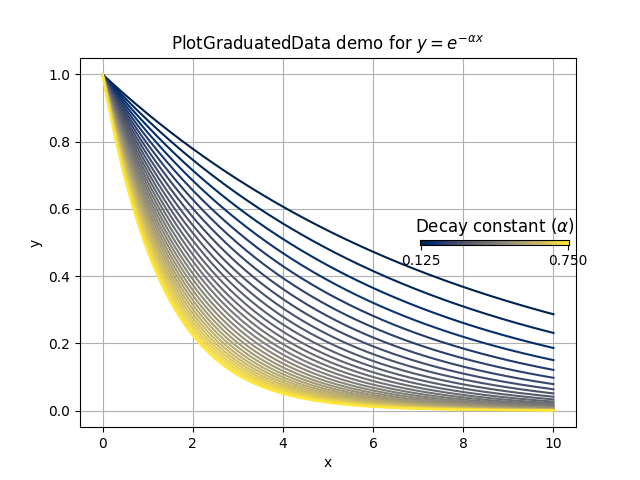

In [4]:
num_plots = 30
alpha_min = 0.125
alpha_max = 0.75

x = np.linspace( 0., 10., 200 )
decay_constant = np.linspace( alpha_min, alpha_max, num_plots )
y = [ np.exp( -d*x ) for d in decay_constant ]

myax = putil.PlotGraduatedData( 
    x,
    y, 
    [ alpha_min, alpha_max ], 
    title='Decay constant ($\\alpha$)', 
    loc='right', 
    llabel=f'{alpha_min:.3f}', 
    rlabel=f'{alpha_max:.3f}', 
)
myax.set_title( 'PlotGraduatedData demo for $y = e^{-\\alpha x}$' )
myax.set_xlabel( 'x' )
myax.set_ylabel( 'y' )



## `PlotLabeledSegmentsImage`

In [3]:
putil.PlotLabeledSegmentsImage?

Signature:
putil.PlotLabeledSegmentsImage(
    img,
    segment_dictionary,
    x_grid=None,
    y_grid=None,
    alpha=1.0,
    default_ax=None,
    figsize=None,
    color_map='tab10',
)
Docstring:
PlotLabeledSegmentsImage: 
Plots a segmented image with integer (>=0) labels in a color scale suitable for a schematic, 
along with a color bar labeled with the various segments taken from the user-provided dictionary. 
Useful to avoid the hassle of colorbar details while plotting segmented images. 
This routine is extremely useful for rendering wave simulations against a semi-transparent backdrop. 

Inputs: 

x:                      Image of size MxN
segment_dictionary:     Dict of the form { 0:'class 0', 1:'class 1', ... }
x_grid:                 A linspace array describing the uniform spacing along the image X-axis. Defaults to matrix coordinates. 
y_grid:                 A linspace array describing the uniform spacing along the image Y-axis. Defaults to matrix coordinates. 
alpha:     

Text(0.5, 1.0, 'Custom axis ticks and transparency')

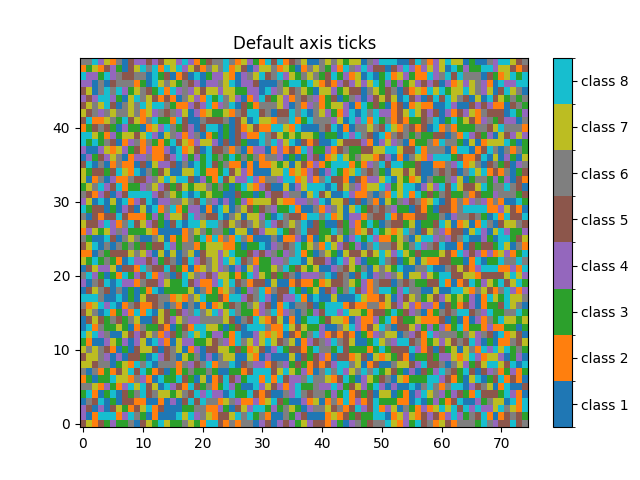

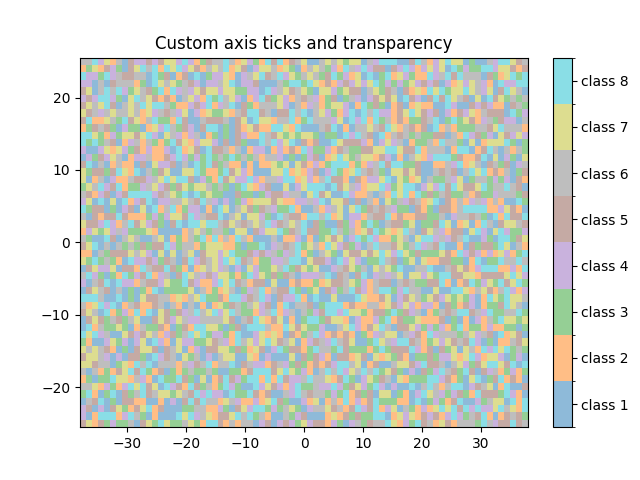

In [3]:
num_classes = 8
segment_dict = { n:f'class {n+1}' for n in range( num_classes ) }
img_shape = ( 50, 75 )

img = np.random.randint( low=0, high=num_classes, size=img_shape )

ax1 = putil.PlotLabeledSegmentsImage( img, segment_dictionary=segment_dict )
ax1.set_title( 'Default axis ticks' )

xg = np.linspace( -75./2., 75./2., 75 )
yg = np.linspace( -25., 25., 50 )
ax2 = putil.PlotLabeledSegmentsImage( img, segment_dictionary=segment_dict, x_grid=xg, y_grid=yg, alpha=0.5 )
ax2.set_title( 'Custom axis ticks and transparency' )
